In [29]:
#Importing required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the datset
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [3]:
#viewing dataset
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [10]:
#dropping the categorical and timestamp variables
data_new = data.drop(['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag'], axis=1)
data_new.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2,1,-73.953918,40.778873,-73.963875,40.771164,400
1,1,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,2,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,2,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,1,1,-74.017120,40.708469,-73.988182,40.740631,848


## Segregating data : Independent and dependent

In [11]:
#seperating independent and dependent variables
x = data_new.drop(['trip_duration'], axis=1)
y = data_new['trip_duration']
x.shape, y.shape

((729322, 6), (729322,))

## train and test split

In [12]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

## Implementing linear regressor

In [13]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [14]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [15]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 603.0310715251042


In [16]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     596.5100587012618


## Paameters of linear regressor

In [17]:
lr.coef_

array([  202.2271497 ,    17.36343026,  2580.89854352, -3406.01426831,
        -905.39784179, -1691.77577117])

Text(0.5, 1.0, 'Coefficient plot')

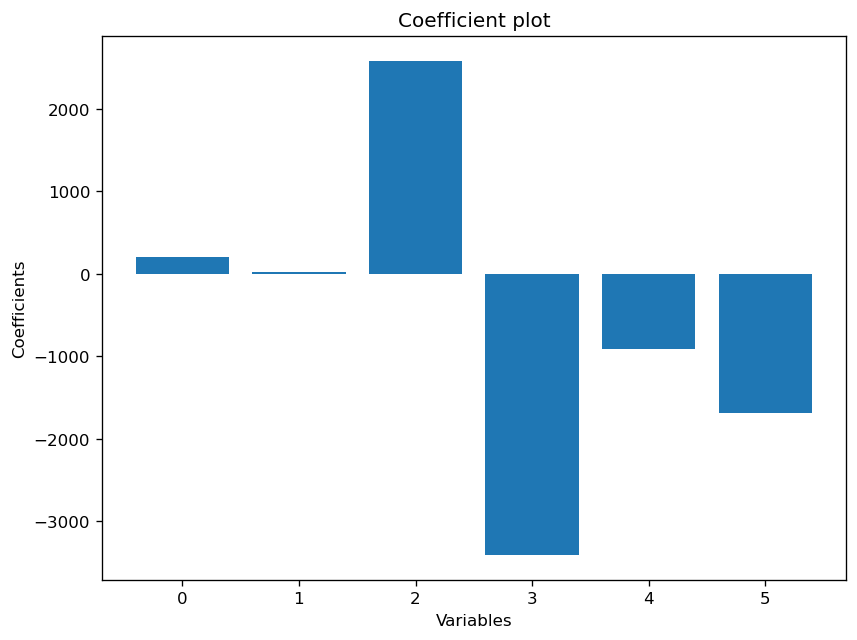

In [38]:
#Plotting the coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Checking assumption of linear model 

In [31]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
14908,2406,669.758218,1736.241782
87154,1457,932.049261,524.950739
666581,163,985.216865,-822.216865
543467,2160,1162.357549,997.642451
105193,402,749.469617,-347.469617


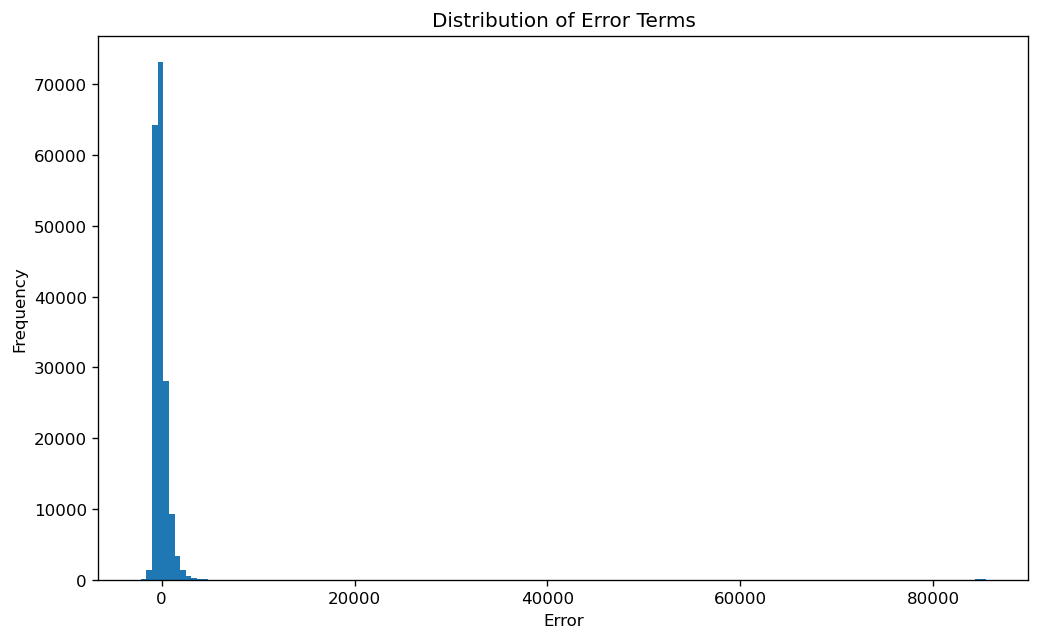

In [32]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

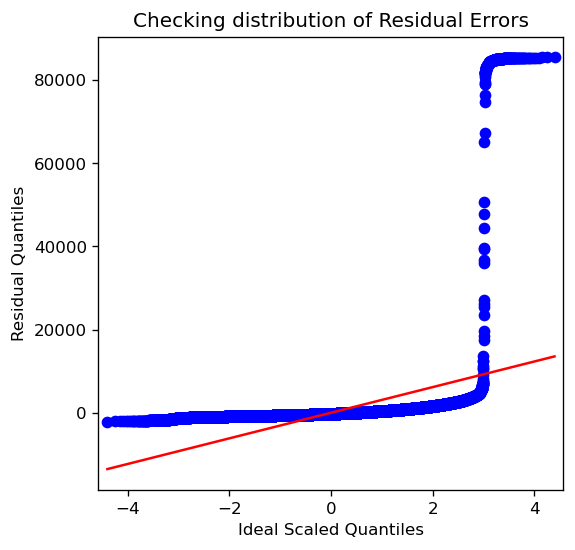

In [33]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [34]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [35]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )


Training Mean Absolute Error 603.0310715251316


In [36]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     596.5100587012893


Text(0.5, 1.0, 'Normalized Coefficient plot')

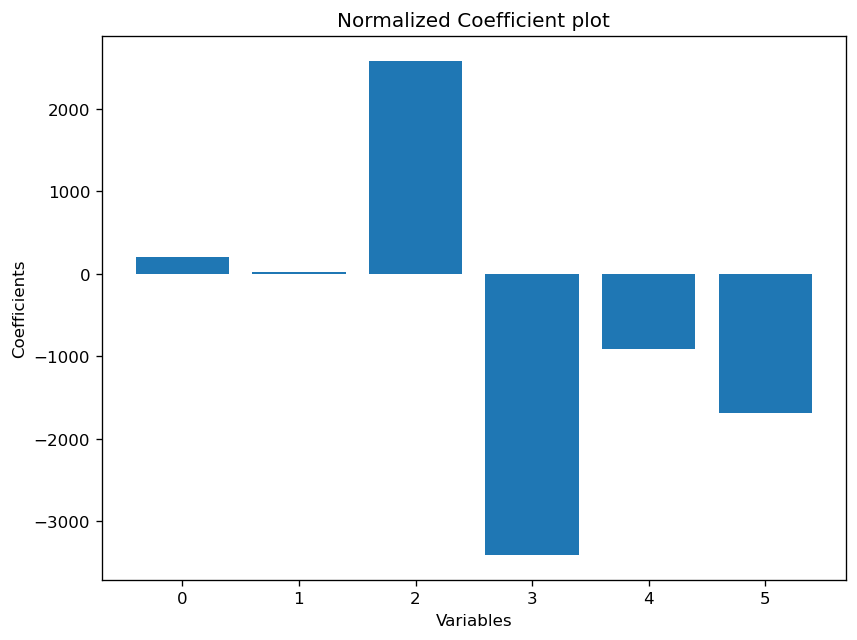

In [37]:
#plotting coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [47]:
#seperating independent and dependent variables
x = data_new.drop(['trip_duration'], axis=1)
y = data_new['trip_duration']
x.shape, y.shape

((729322, 6), (729322,))

In [48]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
14908,2406,669.758218,1736.241782
87154,1457,932.049261,524.950739
666581,163,985.216865,-822.216865
543467,2160,1162.357549,997.642451
105193,402,749.469617,-347.469617


In [49]:
x.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

In [50]:
#arranging coeff with features
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,vendor_id,202.227150
1,passenger_count,17.363430
2,pickup_longitude,2580.898544
3,pickup_latitude,-3406.014268
4,dropoff_longitude,-905.397842


In [51]:
#choosing variables with significance more than 0.5
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [59]:
#Extracting the significant subset do independent Variables
subset = data[sig_var['Variable'].values]
subset.head()

,vendor_id,passenger_count,pickup_longitude
0,2,1,-73.953918
1,1,2,-73.988312
2,2,2,-73.997314
3,2,6,-73.961670
4,1,1,-74.017120


In [53]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [54]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [55]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [56]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 615.6052741970841


In [57]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     609.6255528664017


Text(0.5, 1.0, 'Normalized Coefficient plot')

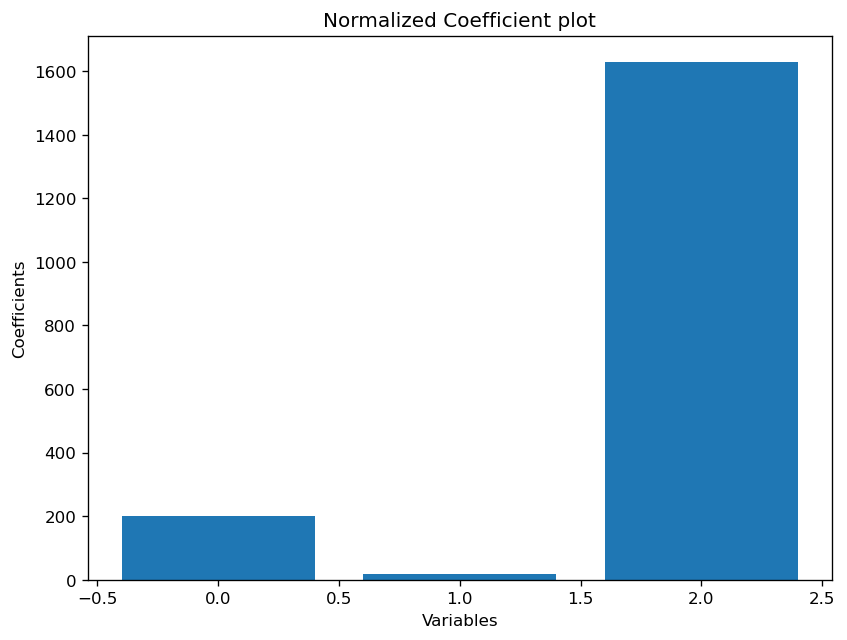

In [58]:
#plotting the coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')